<a href="https://colab.research.google.com/github/Harsha194/Elevate_Labs_Tasks/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIMPLE REGRESSION (Area vs Price):
MAE: ₹1,474,748.13
MSE: ₹3,675,286,604,768.19
R²: 0.2729

MULTIPLE REGRESSION (All Features):
MAE: ₹979,679.69
MSE: ₹1,771,751,116,594.04
R²: 0.6495


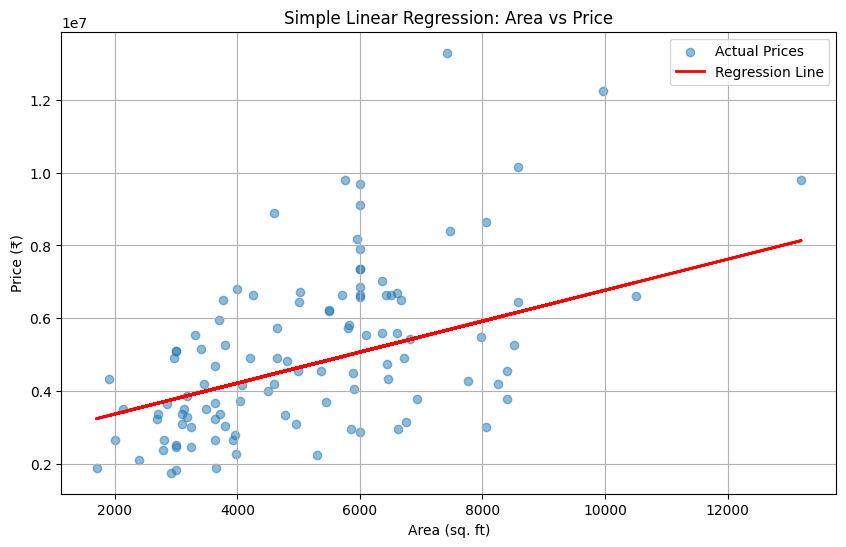


SIMPLE REGRESSION COEFFICIENT: 425.73
Interpretation: Each additional square foot increases price by ₹425.73

MULTIPLE REGRESSION COEFFICIENTS:
                area: ₹235.85
            bedrooms: ₹78,574.49
           bathrooms: ₹1,097,117.27
             stories: ₹406,223.16
            mainroad: ₹366,824.19
           guestroom: ₹233,146.77
            basement: ₹393,159.78
     hotwaterheating: ₹687,881.31
     airconditioning: ₹785,550.58
             parking: ₹225,756.51
            prefarea: ₹629,901.66
    furnishingstatus: ₹-210,397.12

KEY FEATURE INTERPRETATIONS:
- Bathrooms: Each additional bathroom increases price by ₹1,097,117.27
- Air Conditioning: Adds ₹785,550.58 to home value
- Preferred Area: Premium of ₹-210,397.12


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



df = pd.read_csv('Housing.csv')


binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])


X_simple = df[['area']]
y_simple = df['price']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

X_multi = df.drop('price', axis=1)
y_multi = df['price']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)


multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)


y_pred_s = simple_model.predict(X_test_s)
print("SIMPLE REGRESSION (Area vs Price):")
print(f"MAE: ₹{mean_absolute_error(y_test_s, y_pred_s):,.2f}")
print(f"MSE: ₹{mean_squared_error(y_test_s, y_pred_s):,.2f}")
print(f"R²: {r2_score(y_test_s, y_pred_s):.4f}")


y_pred_m = multi_model.predict(X_test_m)
print("\nMULTIPLE REGRESSION (All Features):")
print(f"MAE: ₹{mean_absolute_error(y_test_m, y_pred_m):,.2f}")
print(f"MSE: ₹{mean_squared_error(y_test_m, y_pred_m):,.2f}")
print(f"R²: {r2_score(y_test_m, y_pred_m):.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, alpha=0.5, label='Actual Prices')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nSIMPLE REGRESSION COEFFICIENT: {simple_model.coef_[0]:.2f}")
print("Interpretation: Each additional square foot increases price by ₹" +
      f"{simple_model.coef_[0]:.2f}")

print("\nMULTIPLE REGRESSION COEFFICIENTS:")
for feature, coef in zip(X_multi.columns, multi_model.coef_):
    print(f"{feature:>20}: ₹{coef:,.2f}")

print("\nKEY FEATURE INTERPRETATIONS:")
print(f"- Bathrooms: Each additional bathroom increases price by ₹{multi_model.coef_[2]:,.2f}")
print(f"- Air Conditioning: Adds ₹{multi_model.coef_[8]:,.2f} to home value")
print(f"- Preferred Area: Premium of ₹{multi_model.coef_[11]:,.2f}")